In [1]:
from pathlib import Path

data_dir = Path("/scratch/LASTRO/dataset")

idx = "002"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(data_dir / idx / "ellipses.csv")

df.head()

,Unnamed: 0,shape_r,ra,dec,type,width,height,angle,idx_x_ra,idx_y_dec
0,0,1.500000,1.178855,-88.507941,PSF,0.000417,0.000417,0.000000,175,4
1,1,1.500000,1.547150,-88.507851,PSF,0.000417,0.000417,0.000000,43,6
2,2,2.451612,1.266127,-88.507411,DEV,0.001362,0.000656,49.458466,144,12
3,3,1.911207,1.343978,-88.507283,REX,0.000531,0.000531,0.000000,116,13
4,4,1.500000,1.382365,-88.507027,PSF,0.000417,0.000417,0.000000,102,17


In [4]:
import tifffile

image = tifffile.imread(data_dir / idx / "image.tif")

image.shape

(229, 229, 3)

In [5]:
meta = pd.read_json(data_dir / idx / "metadata.json")

meta

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,NAXIS3,EXTEND,COMMENT,SURVEY,VERSION,...,CD2_2,IMAGEW,IMAGEH,RA,DEC,Radius,pixsize,band,data_release,psf_width
0,True,-32,3,229,229,3,True,FITS (Flexible Image Transport System) forma...,LegacySurvey,DR10,...,0.000073,229,229,1.35,-88.5,0.5,0.262,grz,10,1.5
1,True,-32,3,229,229,3,True,"and Astrophysics', volume 376, page 359; bib...",LegacySurvey,DR10,...,0.000073,229,229,1.35,-88.5,0.5,0.262,grz,10,1.5


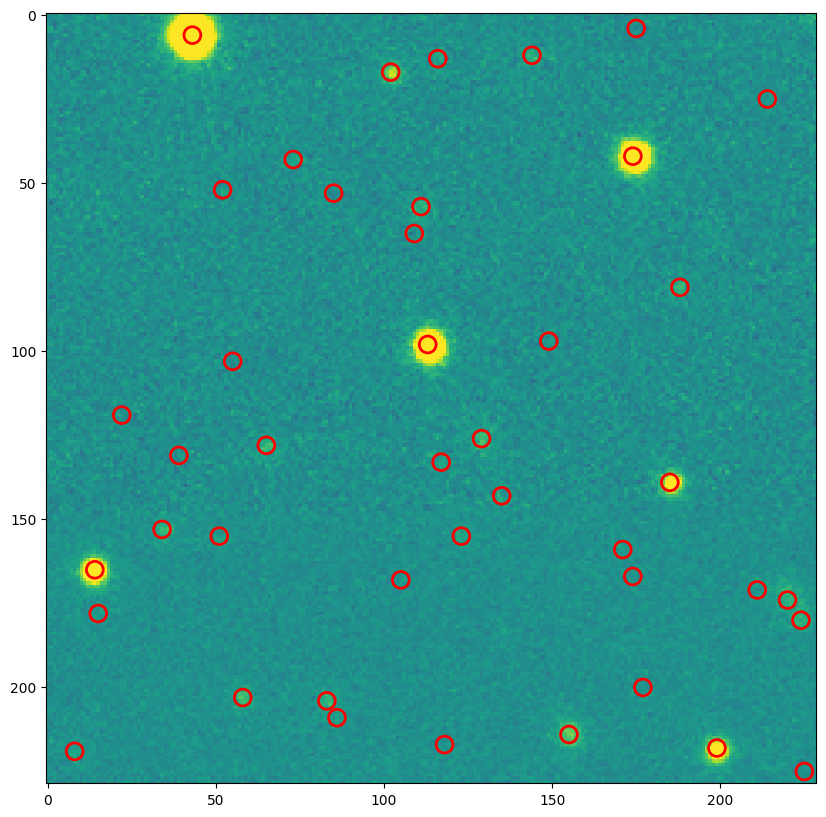

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(np.mean(image, axis=2), vmin=-0.1, vmax=0.1)

for i, (ellipse_x_px, ellipse_y_px) in enumerate(zip(df['idx_x_ra'], df['idx_y_dec'])):
    el1 = Ellipse(xy=(ellipse_x_px, ellipse_y_px), width=5, height=5, edgecolor="red", fc="None", lw=2)
    
    ax.add_patch(el1)

plt.show()